# Key Topics from Probability and Statistics

## What is probability?  

Classical view arose from gambling with dice and holds that outcomes have equal probabilty.  

Subjective view uses a model with randomness such as the payoff to a particular gamble.  

Frequentist view holds that probability is based on the history of outcomes from an experiment, such as the probability the stock market goes up tomorrow or P(stock market goes up tomorrow).

## Components of an Experiment

### Sample space, $S$, which is the set of all possible outcomes.

Examples: 

1. Flipping a US penny, $S=\{Heads,Tails\}$

2. Throwing a die, $S=\{1,2,3,4,5,6\}$

3. Throwing two dice, $S=\{i,j\}: i,j=1,2,3,4,5,6$

### Events, $A$, which are any subset of $S$

Examples: 

1. $Heads$ from $\{Heads,Tails\}$

2. $2$ from $\{1,2,3,4,5,6\}$

### Probability 

$P: A\rightarrow[0,1]$ or $P(A)$

## Properites of Probability

1. The probability of an event occuring lies between 0 and 1: $P(A)\in[0,1]$

2. The probability of the sample space occurring is 1: $P(S)=1$

3. Summation: $P(A \bigcup B) = P(A) + P(B)$ for independent events

4. Conditioning: $P(A|B) = P(A)$ for independent events

5. Complimentary: $P(A^c) = 1-P(A)$

# Random Variables

We operationalize all of this stuff through the use of Random Variables (both discrete and continuous) and examine important characteristics of these animals (moments) such as mean, variance (standard error), and correlation (when we have more than one RV).

##Examples of Discrete RVs
The experiment is to toss a coin 25 times.  The random variable is the outcome, $\{Heads, Tails\}$, from which we can calculate a mean and a standard deviation.

The experiment is toss two dice 10 times.  The random variables are the outcomes of each toss, from which we can calculate a mean, a standard deviation, and a correlation.  Technically, this is a binomial random variable (multiple experiments of a single Bernoulli trial).

Let's make this practical and do some statistical computing.

In [1]:
import numpy as np
from numpy import random

In [2]:
coin = random.random_integers(0, 1, 25)
print coin

[0 1 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0]


In [3]:
print coin.mean(), coin.std()

0.4 0.489897948557


In [4]:
die1 = random.random_integers(1, 6, 10)
die2 = random.random_integers(1, 6, 10)
print die1, die2

[5 6 3 5 1 6 2 5 6 6] [1 6 2 3 1 2 1 4 5 1]


In [5]:
print die1.mean(), die1.std(), die2.mean(), die2.std(), np.corrcoef(die1, die2)[0, 1]

4.5 1.74642491966 2.6 1.74355957742 0.525452268319


### Other Discrete RVs

1. Multinomial (multiple outcomes, such as position A, B, C, or D).
2. Discrete uniform (roll of a die or dice).
3. Poisson (integer-valued, often used for counting, such as the number of stars or the number of visits to the doctor).

## Examples of (Important) Continuous RV

### Logistic

Cumulative Density Function

$F(x)=\displaystyle{\frac{1}{1+\exp(-x)}}$

Probability Density Function

$f(x)=F^\prime(x)=\displaystyle{\frac{\exp(-x)}{1+\exp(-x)}}$

In [8]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)

x = np.linspace(-10,10,1000)
pdf = np.exp(-x)/(1+np.exp(-x))**2
cdf = 1/(1+np.exp(-x))

Populating the interactive namespace from numpy and matplotlib


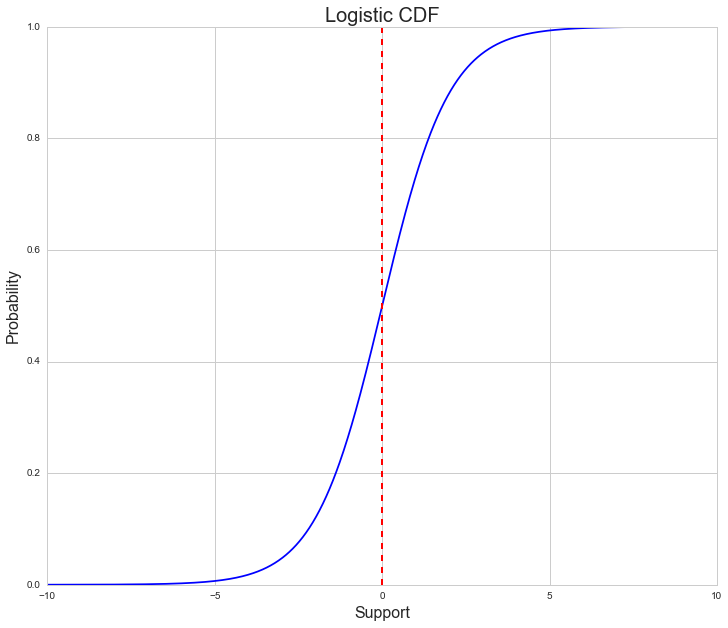

In [7]:
plt.figure(figsize = (12,10))
plt.plot(x, cdf, 'b')
plt.xlabel('Support', fontsize = 16)
plt.ylabel('Probability', fontsize = 16)
#plt.ylim((0,.3))
plt.title('Logistic CDF', fontsize = 20)
plt.axvline(0, color='r', ls='--', lw=2.0)

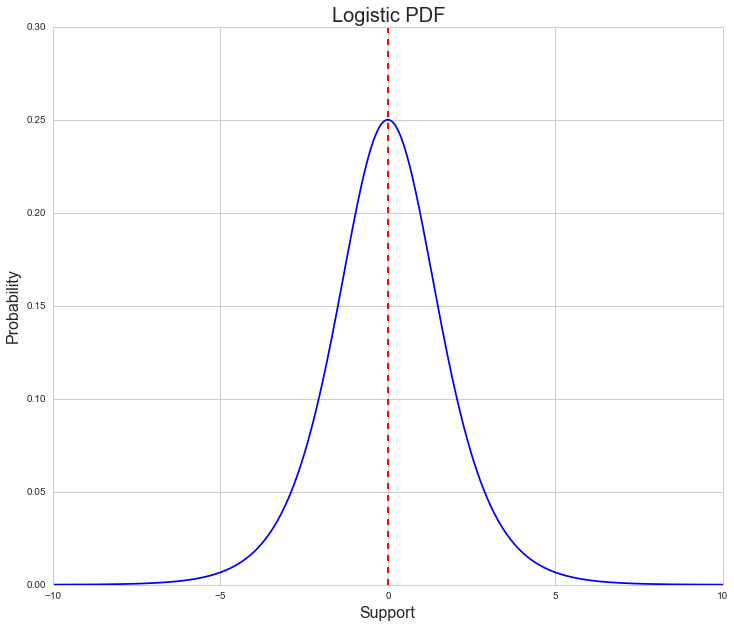

In [8]:
plt.figure(figsize = (12,10))
plt.plot(x, pdf, 'b')
plt.xlabel('Support', fontsize = 16)
plt.ylabel('Probability', fontsize = 16)
plt.ylim((0,.3))
plt.title('Logistic PDF', fontsize = 20)
plt.axvline(0, color='r', ls='--', lw=2.0)

### Mathematical Digression

The following relations can be used to show that the logistic RV meets the properties of probability.

$x^0=1 \text{ } \forall x\in\Re$

$\infty^{-1}=0$

$\exp(\infty)=\infty$

$\exp(-\infty)=0$

$\alpha^\infty=0 \text{ for } \mid\alpha\mid<1$

### Univariate Standard Normal (or Gaussian), denoted $N(0,1)$

Probability Density Function

$f(x)=\displaystyle{\frac{1}{\sqrt{2\pi}}}\exp\{-\frac{1}{2}x^2\}$

For $N(\mu,\sigma^2)$ formula is:

$f(x)=\displaystyle{\frac{1}{\sqrt{2\pi\sigma^2}}}\exp\{-\frac{1}{2\sigma^2}(x-\mu)^2\}$

In [9]:
x = np.linspace(-10,10,1000)
pdf = np.exp(-0.5*x**2)/np.sqrt(2*np.pi)

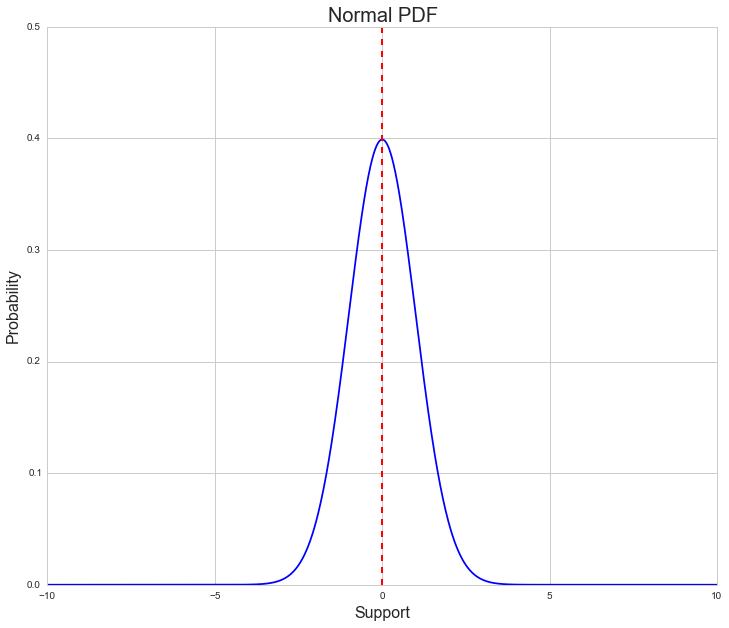

In [10]:
plt.figure(figsize = (12,10))
plt.plot(x, pdf, 'b')
plt.xlabel('Support', fontsize = 16)
plt.ylabel('Probability', fontsize = 16)
plt.ylim((0,.5))
plt.title('Normal PDF', fontsize = 20)
plt.axvline(0, color='r', ls='--', lw=2.0)

### Other Continuous RVs

1. Student's t distribution (for small-sample hypothesis testing).
2. Uniform over a range (for random number generation).
3. Chi-Squared, the square of the normal (for joint hypothesis testing).
4. Log normal, the transformation of non-negative things like wages or stock returns

### Bivariate Normal with Correlation $\rho$

See https://en.wikipedia.org/wiki/Multivariate_normal_distribution

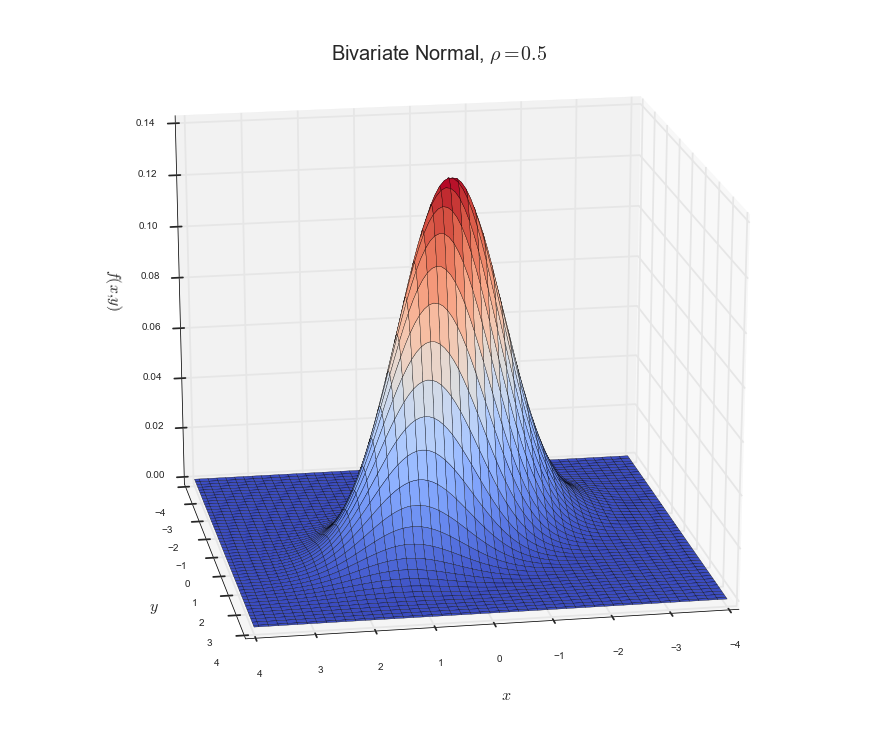

In [11]:
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

x, y = np.linspace(-4, 4, 100), np.linspace(-4, 4, 100)
x, y = np.meshgrid(x, y)
z = np.mat(np.zeros(2))
p = np.zeros(np.shape(x))
R = np.matrix([[1, 0.5],[0.5, 1]])
Rinv = linalg.inv(R)

for i in xrange(len(x)):
    for j in xrange(len(y)):
        z[0, 0] = x[i, j]
        z[0, 1] = y[i, j]
        p[i, j] = (1.0 / (2 * np.pi) * np.sqrt(linalg.det(R))) * np.exp(-(z * Rinv *z.T) / 2)

fig = plt.figure(figsize = (12, 10))
ax = Axes3D(fig)
#ax.plot_wireframe(x, y, p, rstride=3, cstride=3, color='#AD5300')
ax.plot_surface(x, y, p, rstride=2, cstride=2, cmap=cm.coolwarm, shade='interp')
#ax.plot_wireframe(x, y, p, rstride=3, cstride=3, color='black')
ax.view_init(20, 80) # rotation through 20, 40, 60, 80
ax.set_xlabel(r'$x$', fontsize = 16)
ax.set_ylabel(r'$y$', fontsize = 16)
ax.set_zlabel(r'$f(x, y)$', fontsize = 16)
ax.set_title(r'Bivariate Normal, $\rho = 0.5$', fontsize = 20)

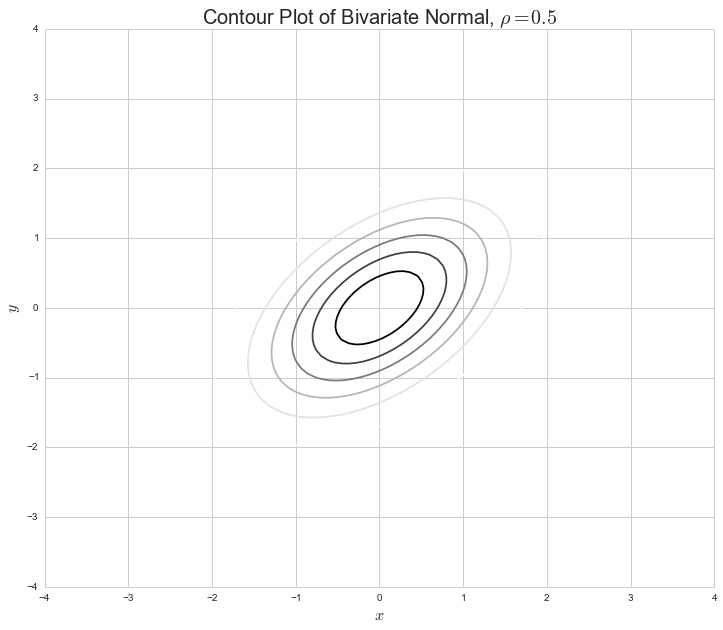

In [12]:
fig = plt.figure(figsize = (12, 10))
ax = fig.gca()
ax.contour(x, y, p)  
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_xlabel(r'$x$', fontsize = 16)
ax.set_ylabel(r'$y$', fontsize = 16)
ax.set_title(r'Contour Plot of Bivariate Normal, $\rho = 0.5$', fontsize = 20)

## Generating Sample Data, Important Moments, and Scatterplots

In statistical learning, we often work with strucutured data and undertake an analysis of those data.  Often this is called "dimension reduction," in that we seek to develop lower-dimensional but informative representations of the data.  (You will deal with unstructured data later in the course.)

Again, we will allow the computer to do the heavy lifting for us.  Let's start generating some random samples and playing with them.

In [18]:
ss = 1000 # Sample size of the observed data
mean = [0, 0] # Mean zero
corr = 0.5 # Correlation 0.5
R = np.matrix([[1, corr],[corr, 1]]) 
x1, x2 = np.random.multivariate_normal(mean, R, ss).T # Draw the observed data

In [14]:
print x1.mean(), x1.var(), x1.std()

-0.0146234067886 0.993052903229 0.996520397799


In [15]:
print x2.mean(), x2.var(), x2.std()

0.039339953624 0.995277418143 0.997635914622


In [16]:
print np.corrcoef(x1, x2)[1, 0]

0.488767644614


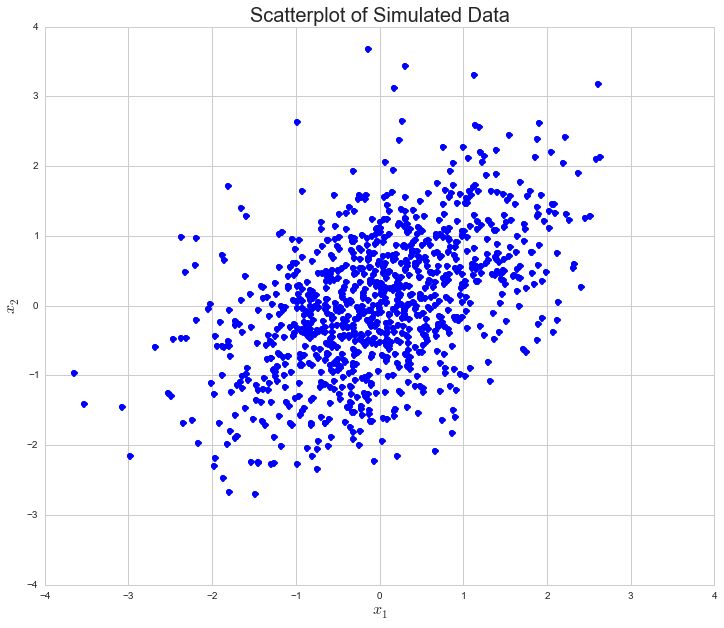

In [17]:
plt.figure(figsize=(12, 10))
plt.plot(x1, x2, 'bo')
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel(r'$x_1$', fontsize = 16)
plt.ylabel(r'$x_2$', fontsize = 16)
plt.title(r'Scatterplot of Simulated Data', fontsize = 20)

## Prob/Stats Homework

Using R or Python:

1.  Suppose you had two 8-sided dice, and your experiment is toss these two dice 25 times. The random variables are the outcomes on each die from each toss.  Calculate the mean, standard deviation, and correlation of these two random variables.

2.  Generate 1,000 draws from the bivariate normal, setting it to 0, -0.5, 0.8, and 0.99.  Graph the scatter plots, calculate moments, and generate scatterplots.  How does the negative correlation affect your results, in particular the scatterplots?  How does high correlation affect your results?  

2.  Increase the sample size to 10,000 and repeat 2 above.  How does the larger sample affect your results?  

3.  Return to a sample size of 1,000.  Increase the variances of $x_1$ to 3 and of $x_2$ to 5.  Repeat 1 above.  How does the larger variance affect your results?

4.  Are there any general conclusions that you can draw from this exercise?

Submit code and results.

In [3]:
# Question 1
die1,die2 = [random.random_integers(1,8,25) for i in range(2)]
print die1.mean(), die1.std(), die2.mean(), die2.std(), np.corrcoef(die1,die2)[0,1]

4.52 2.09990475975 4.52 2.1930800259 0.123684678133


In [24]:
def b(coef, ss=1000, var=1):
    mean = [0, 0]
    R = np.matrix([[var, coef], [coef, var]])
    x1, x2 = np.random.multivariate_normal(mean, R, ss).T
    print "Correlation = ", coef, "Variance = ", var, "Sample Size = ", ss
    print x1.mean(), x1.var(), x1.std()
    print x2.mean(), x2.var(), x2.std()
    print np.corrcoef(x1, x2)[1, 0]
    
    plt.figure(figsize=(12, 10))
    plt.plot(x1, x2, 'bo')
    plt.xlim(-10, 10)
    plt.ylim(-10, 10)
    plt.xlabel(r'$x_1$', fontsize = 16)
    plt.ylabel(r'$x_2$', fontsize = 16)
    plt.title(r'Scatterplot of Simulated Data with Correlation %s and Variance %s' % (coef, var), fontsize = 20)

Correlation =  0 Variance =  1 Sample Size =  1000
-0.046128710136 1.00519215384 1.00259271583
0.0663359705245 1.01314459313 1.00655083981
0.0459130679329
Correlation =  -0.5 Variance =  1 Sample Size =  1000
0.00189597556421 0.989941601124 0.994958090135
-0.00569485350896 0.975987209058 0.987920649171
-0.498400958335
Correlation =  0.8 Variance =  1 Sample Size =  1000
0.0931788179417 0.94079621507 0.969946501138
0.0930594671882 0.963441209712 0.981550411193
0.785804515965
Correlation =  0.99 Variance =  1 Sample Size =  1000
0.0122799583507 0.971129615101 0.985459088497
0.0140920174016 0.965896391204 0.982800280425
0.989571434516


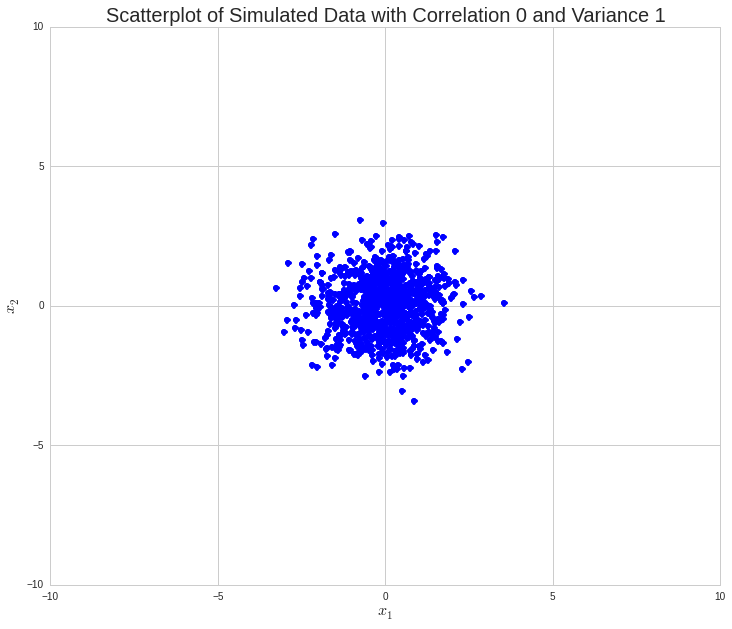

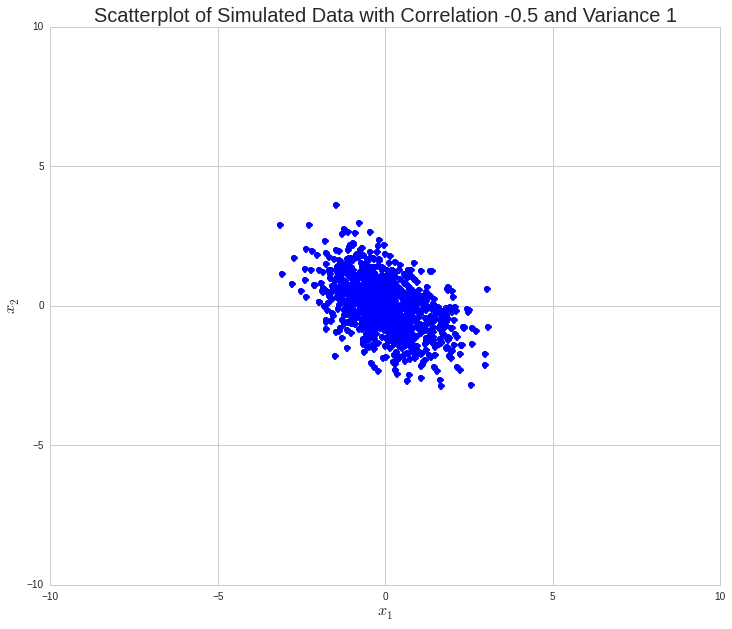

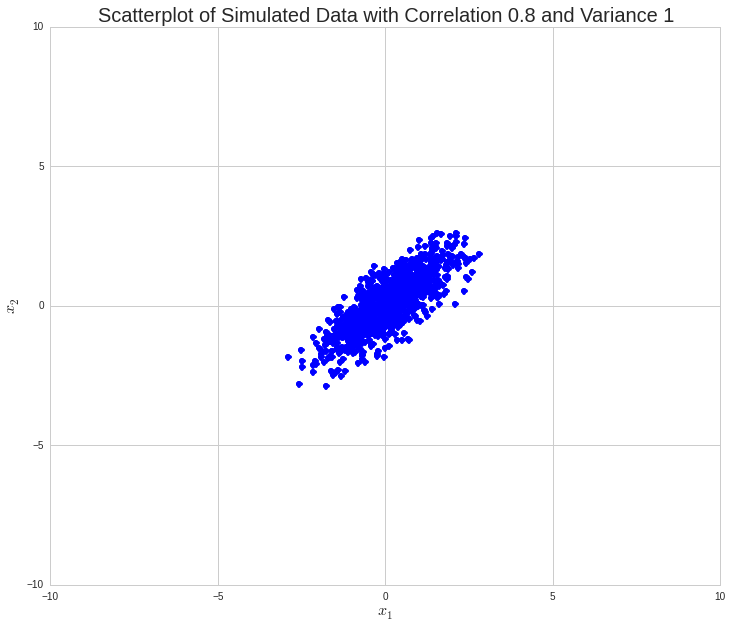

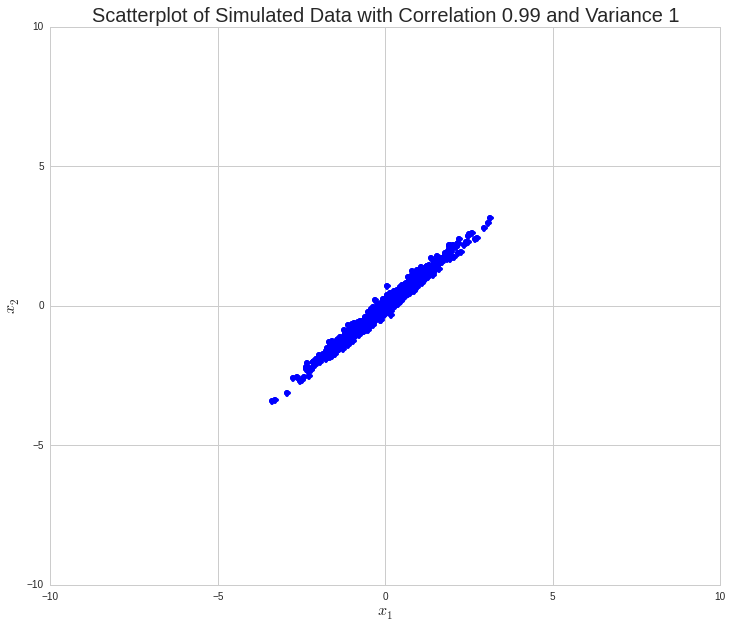

In [25]:
# Question 2
for coef in [0, -.5, .8, .99]:
    b(coef)

Correlation =  0 Variance =  1 Sample Size =  10000
-0.00773878310977 0.984503665148 0.99222158067
0.0151794584304 0.990262629516 0.995119404652
0.00367508003154
Correlation =  -0.5 Variance =  1 Sample Size =  10000
-0.00932651548087 1.00124148551 1.00062055021
0.010749591648 1.01663863888 1.00828499884
-0.503264381591
Correlation =  0.8 Variance =  1 Sample Size =  10000
-0.000550078118323 0.994860084718 0.997426731503
0.00456398182854 1.01047920283 1.00522594616
0.802378052255
Correlation =  0.99 Variance =  1 Sample Size =  10000
0.00529675847366 0.994815889024 0.9974045764
0.00418812726144 0.996373273317 0.998184989527
0.989771412215


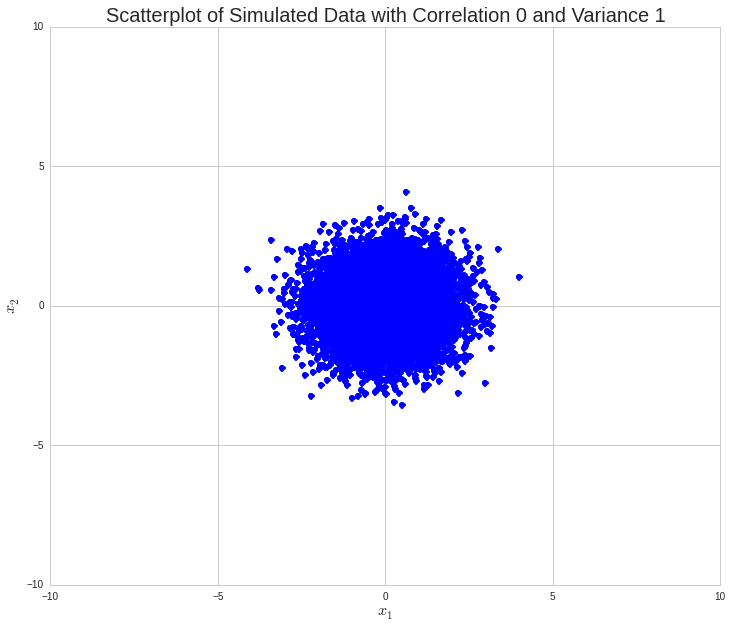

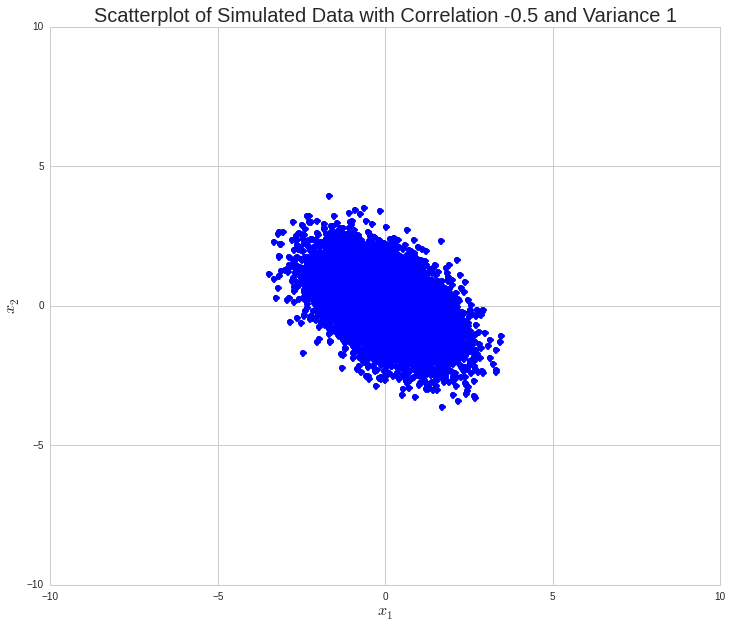

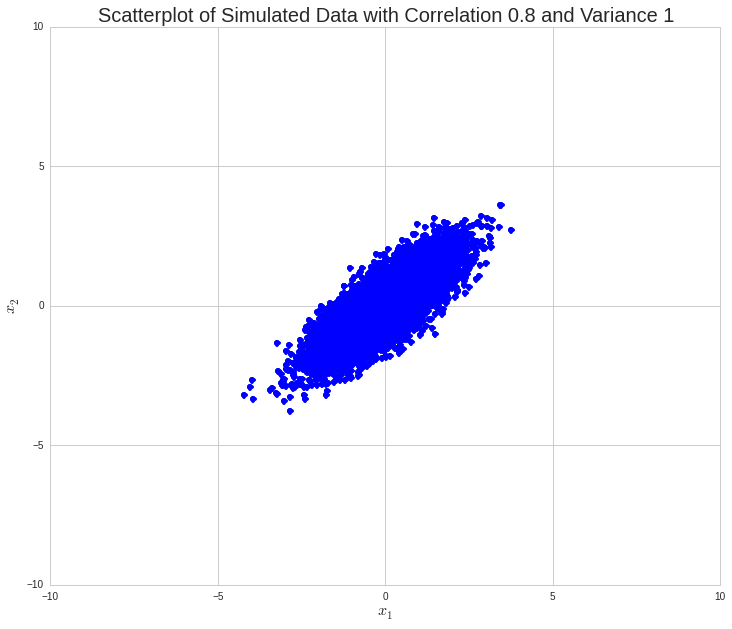

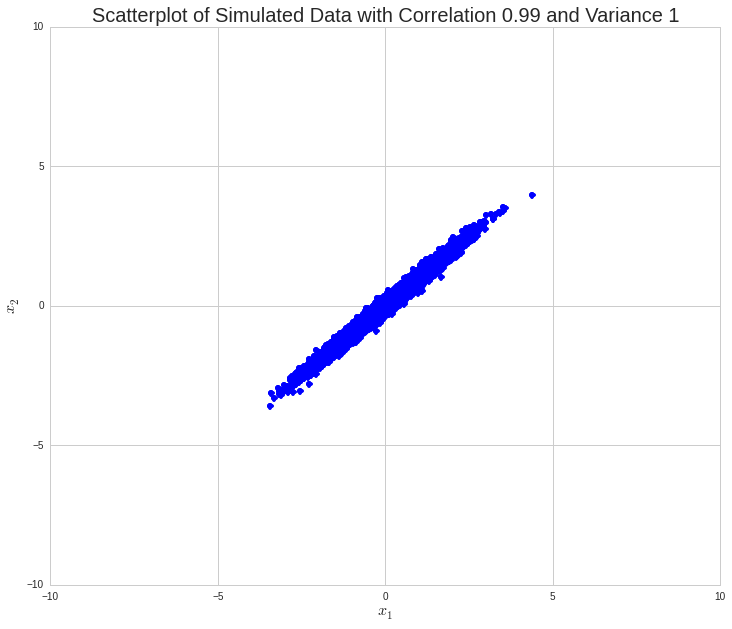

In [26]:
# Question 3
for coef in [0, -.5, .8, .99]:
    b(coef, 10000)

The larger sample size makes the calculated moments more likely to be closer to the set value.  For example, the variances all came out right around .99 for the 10,000 samples, but ranged as far as .95 or 1.05 for the 1000 samples.

Correlation =  0 Variance =  3 Sample Size =  10000
0.0115271506794 3.02811831543 1.74014893484
-0.0116863793938 3.0073540841 1.73417244935
-0.00386935435732
Correlation =  -0.5 Variance =  3 Sample Size =  10000
0.00211851642029 3.08645777247 1.75683174279
0.0147167545103 2.97751773419 1.72554853139
-0.173220642399
Correlation =  0.8 Variance =  3 Sample Size =  10000
-0.00863355643634 3.06716332714 1.75133187236
0.00383367288325 2.94005885437 1.71465998214
0.274745149973
Correlation =  0.99 Variance =  3 Sample Size =  10000
0.0157042617536 3.03156875263 1.74114007266
0.0209609329564 3.02234892506 1.73849041558
0.336464039072
Correlation =  0 Variance =  5 Sample Size =  10000
0.0414004243039 5.05287949313 2.24786109294
-0.00531057389127 4.96102214034 2.22733521059
0.00794943562072
Correlation =  -0.5 Variance =  5 Sample Size =  10000
-0.00843388901817 4.86748757033 2.20623833035
0.00181842044009 5.01428124246 2.23925908337
-0.0904013281093
Correlation =  0.8 Variance =  5 Sample Si

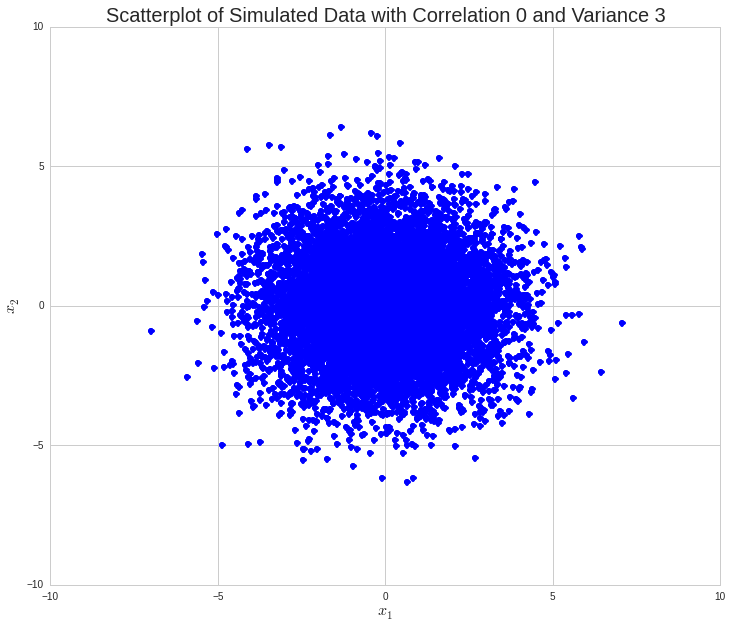

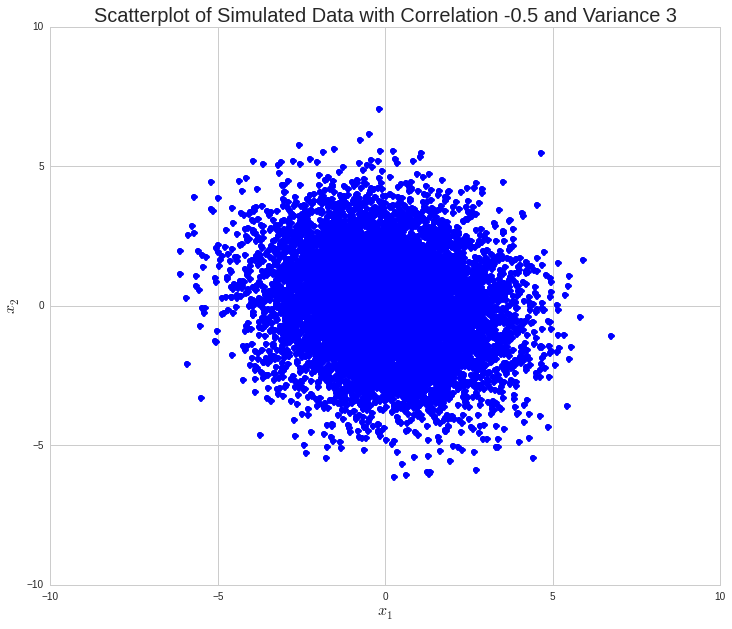

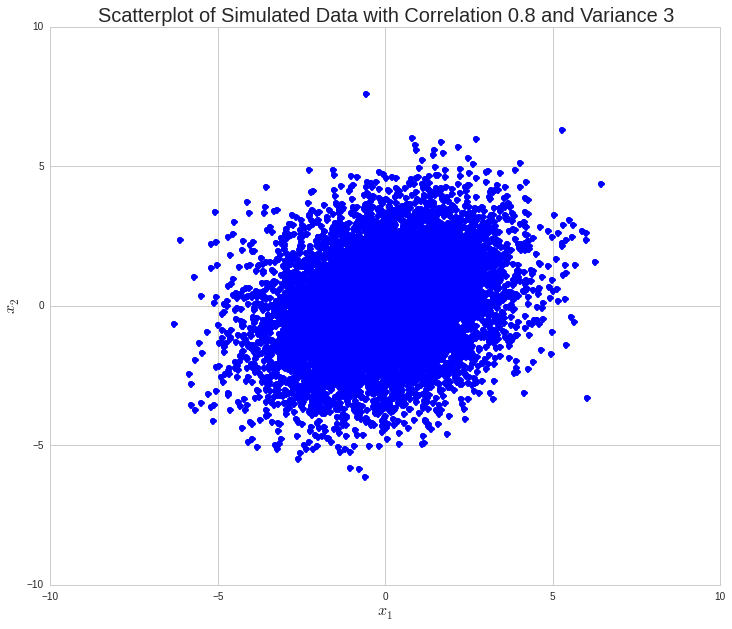

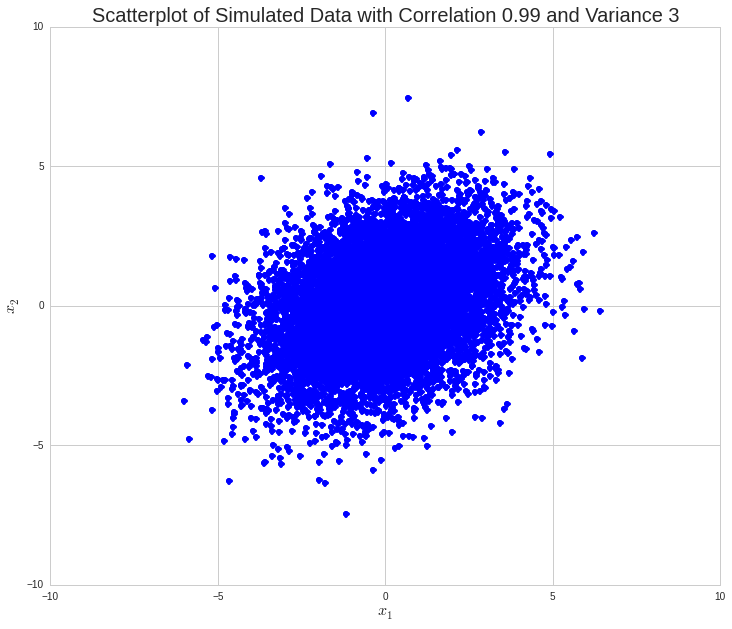

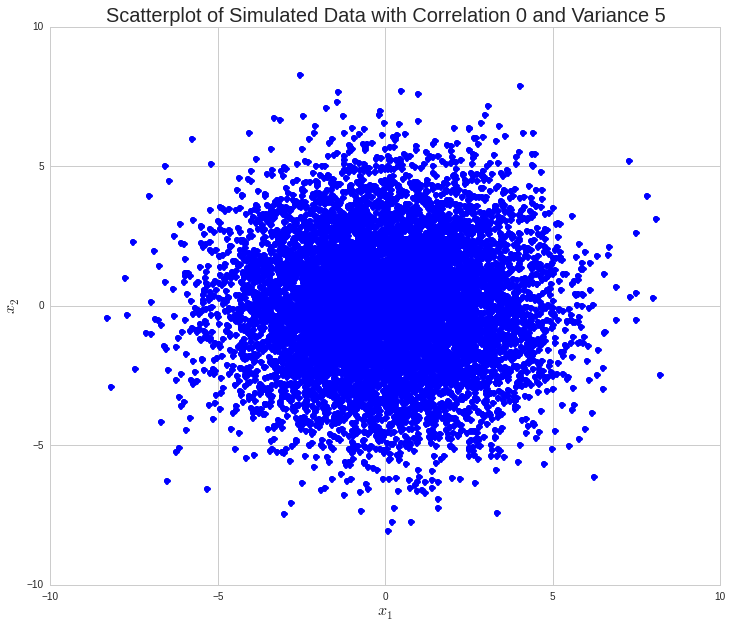

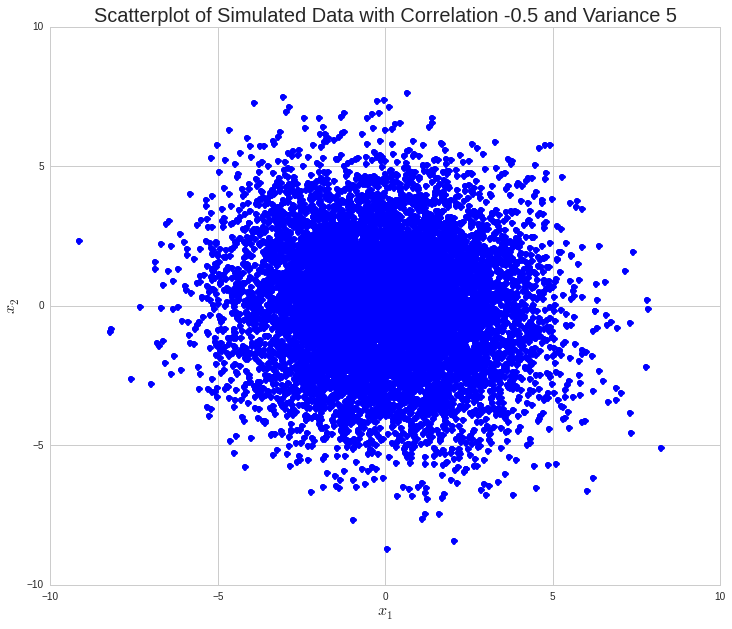

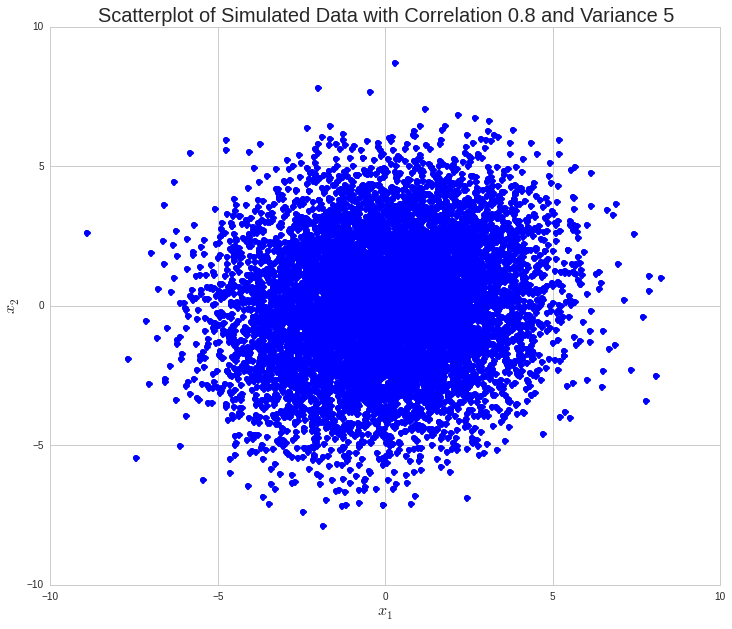

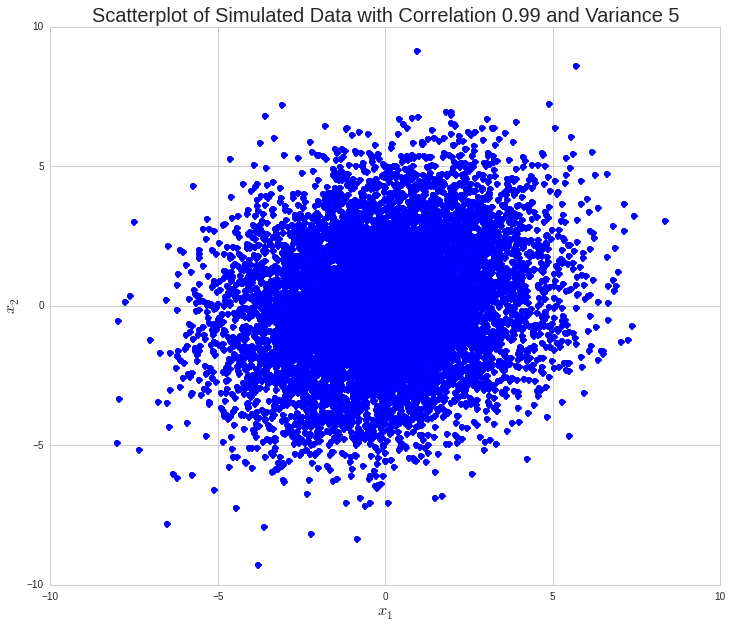

In [27]:
# Question 4
for var in [3, 5]:
    for coef in [0, -.5, .8, .99]:
        b(coef, 10000, var)

With higher variance the data is much more spread out.